# Prerequisites
- Install required libraries in requirements.txt  


## 2.6 DATASET: VOOBEELD7 

Import the data from **voorbeeld7_1.sav** and save the table under the name `chol1`.

#### (a) ScatterPlot
Make a scatter plot, with the function lmplot (using the seaborn library), from the column cholesterol chol (y-axis) and age leeftijd (x-axis). Add then a regression line to the graph with
lmplot(..,fit_reg=True)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stm
import pyreadstat

In [31]:
chol1, meta = pyreadstat.read_sav("./voorbeeld7_1-1.sav")
print(meta.column_names)
chol1.head()

['id', 'chol', 'leeftijd', 'bmi', 'actief', 'roken', 'sekse', 'alcohol']


,id,chol,leeftijd,bmi,actief,roken,sekse,alcohol
0,1.0,7.9,66.0,27.41,1.0,0.0,1.0,0.0
1,2.0,7.5,83.0,26.85,1.0,0.0,1.0,2.0
2,3.0,7.6,84.0,27.24,1.0,0.0,1.0,2.0
3,4.0,6.0,65.0,27.50,1.0,0.0,1.0,2.0
4,5.0,6.2,56.0,27.78,1.0,0.0,1.0,0.0


In [32]:
print(chol1.describe())  
# sekse=sex is a factorial variable
chol1.alcohol.unique() #also alcohol so i will convert them to factors
##chol1 = pd.get_dummies(chol1, columns=["sekse", "alcohol"], drop_first=True)

               id        chol    leeftijd         bmi      actief       roken  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000    6.283400   61.895000   28.241310    1.955000    0.350000   
std     57.879185    0.802654    6.310554    2.961234    0.784892    0.478167   
min      1.000000    4.400000   49.000000   20.797000    1.000000    0.000000   
25%     50.750000    5.800000   57.750000   26.271250    1.000000    0.000000   
50%    100.500000    6.200000   62.000000   28.125000    2.000000    0.000000   
75%    150.250000    6.732500   65.000000   29.732500    3.000000    1.000000   
max    200.000000    8.200000   84.000000   37.565000    3.000000    1.000000   

            sekse     alcohol  
count  200.000000  200.000000  
mean     0.410000    0.765000  
std      0.493068    0.722763  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    1.000000  
max      1.000

array([0., 2., 1.])

In [33]:
chol1

,id,chol,leeftijd,bmi,actief,roken,sekse,alcohol
0,1.0,7.90,66.0,27.410,1.0,0.0,1.0,0.0
1,2.0,7.50,83.0,26.850,1.0,0.0,1.0,2.0
2,3.0,7.60,84.0,27.240,1.0,0.0,1.0,2.0
3,4.0,6.00,65.0,27.500,1.0,0.0,1.0,2.0
4,5.0,6.20,56.0,27.780,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
195,196.0,6.53,64.0,30.417,3.0,1.0,0.0,1.0
196,197.0,6.50,65.0,30.300,3.0,1.0,0.0,1.0
197,198.0,6.40,66.0,29.910,3.0,1.0,0.0,1.0
198,199.0,5.50,64.0,27.400,3.0,1.0,0.0,1.0


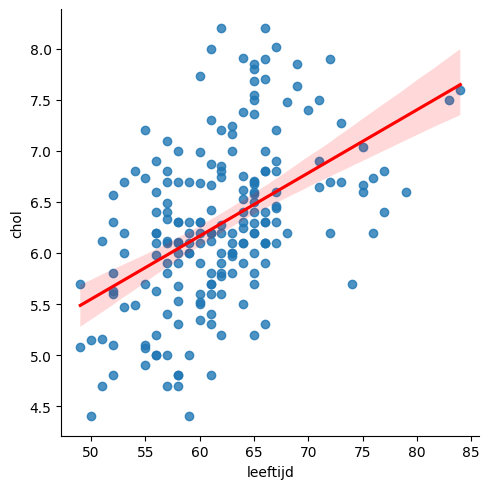

In [34]:
sns.lmplot(data=chol1, y='chol', x='leeftijd',fit_reg=True,  line_kws={"color": "red"})
plt.show()

#### (b) Fit a Linear Model
Fit a linear model for chol with leeftijd using the function ols (using the statsmodels library). The
formula for the model is chol˜leeftijd. Save the fitobject under the name fit1. View the result
with fit1.summary().

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit1 = smf.ols("chol ~ leeftijd", data=chol1).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     61.19
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           3.04e-13
Time:                        16:30:43   Log-Likelihood:                -212.39
No. Observations:                 200   AIC:                             428.8
Df Residuals:                     198   BIC:                             435.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4584      0.492      5.002      0.0

#### (c) Fit a Multiple Linear Model
Fit a model fit2 for chol with leeftijd, bmi, sekse and alcohol. Which factors are statistically
significant?

In [ ]:
fit2 = smf.ols("chol ~ leeftijd + bmi + sekse + alcohol", data=chol1).fit()
print(fit2.summary())


                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     31.93
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.83e-20
Time:                        16:31:25   Log-Likelihood:                -188.94
No. Observations:                 200   AIC:                             387.9
Df Residuals:                     195   BIC:                             404.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1829      0.609     -0.301      0.7

In [49]:
## this if we want to use one-hot encoding
### convert to factors
chol2 = chol1.copy()
chol2["sekse"] = chol2["sekse"].astype(str)
chol2["alcohol"] = chol2["alcohol"].astype(str)

chol2 = pd.get_dummies(chol2, columns=["sekse", "alcohol"], drop_first=True)

chol2 = chol2.rename(columns={
    "sekse_1.0": "sekse_1",
    "alcohol_1.0": "alcohol_Low",
    "alcohol_2.0": "alcohol_High"
})

print(chol2.columns
      )
fit2_factors = smf.ols("chol ~ leeftijd + bmi + actief + roken + sekse_1 + alcohol_Low + alcohol_High", data=chol2).fit()
print(fit2_factors.summary())

Index(['id', 'chol', 'leeftijd', 'bmi', 'actief', 'roken', 'sekse_1',
       'alcohol_Low', 'alcohol_High'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     26.29
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           4.64e-25
Time:                        16:36:54   Log-Likelihood:                -172.11
No. Observations:                 200   AIC:                             360.2
Df Residuals:                     192   BIC:                             386.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025   

#### (d) Residuals and Histogram
- Add the residuals from `fit2` to the table `chol1`.
- Create a histogram of the residuals.

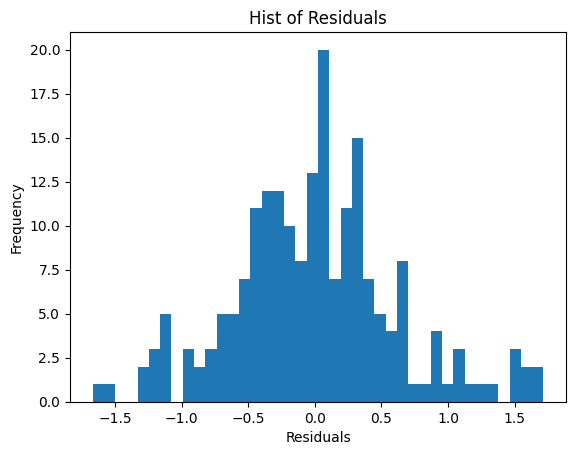

In [56]:
chol1["residuals"] = fit2.resid
plt.hist(chol1["residuals"], bins=40)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Hist of Residuals")
plt.show()


<hr>

## 2.7 DATASET: Births

- Import the dataset **births.csv** and name the table `births`.
- This dataset contains data from **49,703** childbirths from the year **1995**.

#### (a) Recode `child_birth` into `home`
- Create a new variable `home` where:
  - `home = 'at_home'` if the childbirth was a first-line childbirth (at home).
  - Otherwise, `home = 'not_at_home'`.
- Use the **apply** function with a **lambda function** or the **map function** with a dictionary.

#### (b) Recode `parity` into `pari`
- Create a new variable `pari`:
  - `pari = 'primi'` if it is a **first childbirth**.
  - `pari = 'multi'` if it is the **second or more childbirth**.
- Use the **apply** or **map** function.

#### (c) Recode `etnicity` into `etni`
- Create a new variable `etni`:
  - `etni = 'Dutch'` if the woman was **Dutch**.
  - `etni = 'Not Dutch'` if she was **not Dutch**.
- Use `unique()` from the pandas library to inspect the levels of the variable `etnicity`.

#### (d) Logistic Regression Model
- Using the **sklearn** library, create a logistic regression model with the function `LogisticRegression` to predict the probability of childbirth at home.
- Use the variables:
  - `pari`, `age_cat` (age categorized), `etni`, and `urban` (urbanization degree).
- View the model's outcomes using:
  ```
  classification_report()
  ```

#### (e) Decision Tree Model
- Using the **sklearn** library, create a decision tree for predicting childbirth at home with the same variables as the logistic regression model.
- View the decision tree using:
  ```
  tree.plot_tree
  ```

#### (f) Model Comparison with Cross-Validation
- To assess whether the **logistic regression model** or the **decision tree** fits the data better:
  - Fit the models on a **training set**.
  - Calculate accuracy statistics on a **test set** (or use cross-validation).
- Use:
  ```
  sklearn.model_selection
  cross_val_score
  ```
- Determine which model fits the data better.
```